In [1]:
import numpy as np
from nltools.data import Adjacency
import seaborn as sns
from brainiak.isc import bootstrap_isc
%matplotlib inline

In [2]:
def make_correlated_data(num_obs, num_features, corrs, mu=0.0,sigma=1.0):
    """Quick function to generate correlated data given the upper triangle of a correlation matrix"""
    from scipy.spatial.distance import squareform

    mu = [mu] * num_features
    sigma = [sigma] * num_features
    corrs = squareform(corrs)
    np.fill_diagonal(corrs, 1.0)
    # Rescale correlation matrix by variances, given standard deviations of features
    sd = np.diag(sigma)
    # R * Vars = R * SD * SD
    cov = corrs.dot(sd.dot(sd))
    X = np.random.multivariate_normal(mu, cov, size=num_obs)

    return X

In [ ]:
# Generate correlated data
num_trs = 1000
num_subs = 30
num_cells = int((num_features * (num_features - 1) / 2))
corrs = np.random.uniform(low=-1, high=1, size=num_cells)

x = make_correlated_data(num_trs, num_subs, corrs=corrs)

<AxesSubplot:>

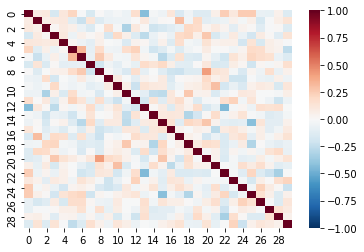

In [11]:
# Plot it to make sure it's symmetric
corrmat = np.corrcoef(x.T)
sns.heatmap(corrmat, cmap='RdBu_r', vmin=-1,vmax=1)

In [12]:
# Create Adjacency object
X = Adjacency(corrmat, matrix_type='similarity')
# Median ISC
X.median()

0.0028299493293925766

In [13]:
# 1 core no parallelization
out_jobs1 =X.isc(n_jobs=1)
out_jobs1

{'isc': 0.0028299493293925766,
 'p': 0.7936412717456509,
 'ci': (-0.01888830822675221, 0.02807737203904172)}

In [14]:
# 2 cores 
out_jobs2 = X.isc(n_jobs=2)
out_jobs2

{'isc': 0.0028299493293925766,
 'p': 0.7800439912017596,
 'ci': (-0.01799797962376179, 0.026901557539205936)}

In [15]:
# 4 cores 
out_jobs2 = X.isc(n_jobs=4)
out_jobs2

{'isc': 0.0028299493293925766,
 'p': 0.7610477904419116,
 'ci': (-0.01564921846884966, 0.030241130678989932)}

In [16]:
# All cores (8 on my machine)
out_jobsall = X.isc()
out_jobsall

{'isc': 0.0028299493293925766,
 'p': 0.7726454709058188,
 'ci': (-0.008974907949958427, 0.026901557539205936)}

In [19]:
# Now with brainiak
observed, ci, p, dist = bootstrap_isc(X.data, n_bootstraps=5000, pairwise=True)
print(f"ISC: {observed}, p: {p}, ci: {ci}")

ISC: [0.00282995], p: [0.34733053], ci: (array([-0.01903863]), array([0.02807737]))
